In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [8]:
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
#getting data from iris dataset

In [9]:
df = pd.read_csv(s, header = None, encoding = 'utf-8')
df.head()
#first 50: setosa
#next 50: versicolor
#last 50: virginica

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
y = df.iloc[:100, 4].values #select setosa and versicolor
y = np.where(y == 'Iris-setosa', -1, 1) #-1 for setosa, 1 for versicolor
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [11]:
X = df.iloc[0:100, [0,2]].values #extract sepal length and petal length

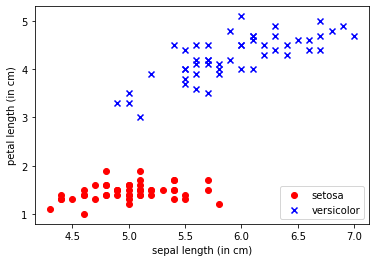

In [12]:
#make plot
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length (in cm)')
plt.ylabel('petal length (in cm)')
plt.legend(loc = 'lower right')
plt.show()

In [18]:
class Perceptron(object):
  def __init__ (self, lr = 0.01, epochs = 50, random_seed = 42):
    self.lr = lr #learning rate
    self.epochs = epochs
    self.random_seed = random_seed
  
  def fit(self, X, y):
    rgen = np.random.RandomState(self.random_seed)
    self.w = rgen.normal(loc = 0.0, scale=0.01, size=1+X.shape[1]) #randomly initialize weights
    self.errors_list = [] #number of misclassifications in each epoch

    for _ in range(self.epochs):
      errors = 0
      for xi, target in zip(X, y):
        update = self.lr * (target - self.predict(xi))
        self.w[1:] += update*xi
        self.w[0] += update
        errors += int(update!= 0.0)
      self.errors_list.append(errors)
    return self

  def net_input(self, X):
    return np.dot(X, self.w[1:]) + self.w[0]
  
  def predict(self, X):
    return np.where(self.net_input(X) >= 0.0, 1, -1)
  

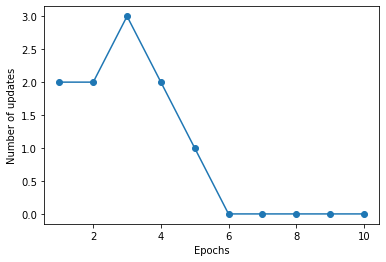

In [19]:
model = Perceptron(lr = 0.1, epochs = 10, random_seed=42)
model.fit(X, y)
plt.plot(range(1, len(model.errors_list) + 1), model.errors_list, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [20]:
from matplotlib.colors import ListedColormap
def plot_decision_boundary(X, y, classifier, resolution=0.02):
  markers = ('s','x','o','#','v')
  colors = ('red','blue','lightgreen','gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  #plot
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha=0.3, cmap = cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for idx, col in enumerate(np.unique(y)):
    plt.scatter(x = X[y==col, 0],
                y=X[y==col, 1],
                alpha=0.8,
                c = colors[idx],
                marker = markers[idx],
                label = col,
                edgecolor='black')

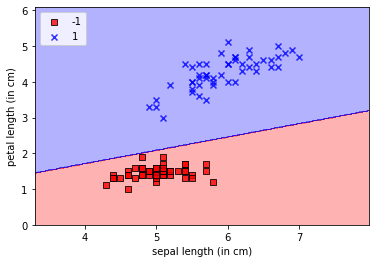

In [21]:
plot_decision_boundary(X, y, classifier=model)
plt.xlabel('sepal length (in cm)')
plt.ylabel('petal length (in cm)')
plt.legend(loc = 'upper left')
plt.show()

In [23]:
class Adaline(object):
    #Adaptive Linear Neuron Classifier
    def __init__ (self, lr=0.01, epochs=50, random_seed = 1):
        self.lr = lr
        self.epochs = epochs
        self.random_seed = random_seed
    
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_seed)
        self.w = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1]+1)
        self.cost_list = []
        
        #batch gradient descent
        for _ in range(self.epochs):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            error = y - output
            self.w[1:] += self.lr * X.T.dot(error)
            self.w[0] += self.lr * error.sum()
            cost = (error**2).sum()/2.0
            self.cost_list.append(cost)
            
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w[1:] + self.w[0])
    
    def activation(self, X):
        #linear activation
        return X
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)


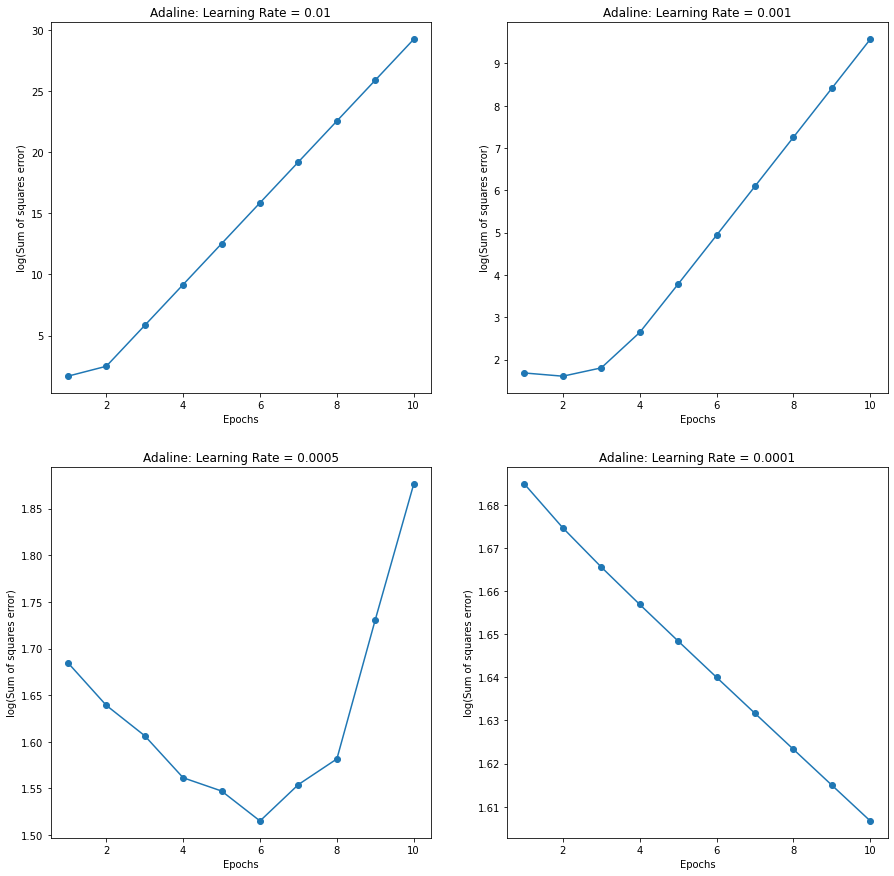

In [24]:
fig, ax = plt.subplots(nrows=2,ncols=2,figsize = (15,15))

ada1 = Adaline(epochs=10, lr=0.01).fit(X,y)
ax[0,0].plot(range(1, len(ada1.cost_list)+1),
          np.log10(ada1.cost_list), marker = 'o')
ax[0,0].set_xlabel('Epochs')
ax[0,0].set_ylabel('log(Sum of squares error)')
ax[0,0].set_title('Adaline: Learning Rate = 0.01')

ada2 = Adaline(epochs=10, lr=0.001).fit(X,y)
ax[0,1].plot(range(1, len(ada2.cost_list)+1),
          np.log10(ada2.cost_list), marker = 'o')
ax[0,1].set_xlabel('Epochs')
ax[0,1].set_ylabel('log(Sum of squares error)')
ax[0,1].set_title('Adaline: Learning Rate = 0.001')

ada3 = Adaline(epochs=10, lr=0.0005).fit(X,y)
ax[1,0].plot(range(1, len(ada3.cost_list)+1),
          np.log10(ada3.cost_list), marker = 'o')
ax[1,0].set_xlabel('Epochs')
ax[1,0].set_ylabel('log(Sum of squares error)')
ax[1,0].set_title('Adaline: Learning Rate = 0.0005')

ada4 = Adaline(epochs=10, lr=0.0001).fit(X,y)
ax[1,1].plot(range(1, len(ada4.cost_list)+1),
          np.log10(ada4.cost_list), marker = 'o')
ax[1,1].set_xlabel('Epochs')
ax[1,1].set_ylabel('log(Sum of squares error)')
ax[1,1].set_title('Adaline: Learning Rate = 0.0001')

plt.show()

Shows the effect of different learning rates on batch gradient descent: \
Very small learning rate - takes longer time to reach minima \
Large learning rate - overshoots minima, possibly increasing error

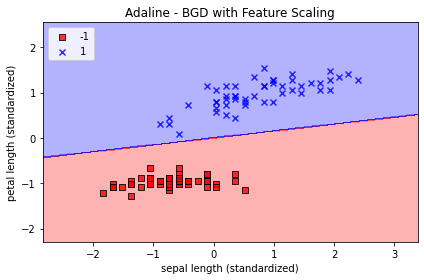

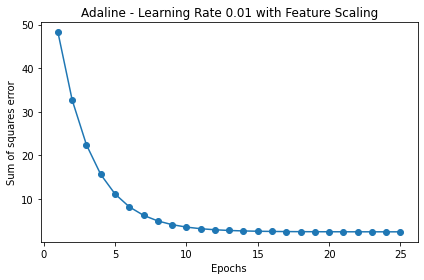

In [13]:
#improving gradient descent by feature scaling
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean())/X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean())/X[:,1].std()

ada_fs = Adaline(lr=0.01, epochs = 25)
ada_fs.fit(X_std, y)
plot_decision_boundary(X_std, y, classifier=ada_fs)
plt.title('Adaline - BGD with Feature Scaling')
plt.xlabel('sepal length (standardized)')
plt.ylabel('petal length (standardized)')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_fs.cost_list)+1),
         ada_fs.cost_list, marker='o')
plt.title('Adaline - Learning Rate 0.01 with Feature Scaling')
plt.xlabel('Epochs')
plt.ylabel('Sum of squares error')
plt.tight_layout()
plt.show()

In [14]:
class Adaline_SGD(object):
    #Adaptive Linear Neuron Classifier
    def __init__ (self, lr=0.01, epochs=10, random_seed = 1,shuffle=True):
        self.lr = lr
        self.epochs = epochs
        self.random_seed = random_seed
        self.w_initialized = False
        self.shuffle = shuffle
    
    def fit(self, X, y):
        self._initialize_weights(X.shape[1])
        self.cost_list = []
        
        #stochastic gradient descent
        for _ in range(self.epochs):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X,y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost)/len(y)
            self.cost_list.append(avg_cost)
            
        return self
    
    def partial_fit(self, X, y):
        #fits without reinitializing weights
        #online learning
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X,y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X,y)
        
        return self
    
    def _shuffle(self, X, y):
        #shuffle training data
        rand = self.rgen.permutation(len(y))
        return X[rand], y[rand]
    
    def _initialize_weights(self, m):
        self.rgen = np.random.RandomState(self.random_seed)
        self.weights = self.rgen.normal(loc=0.0, scale=0.01,
                                       size = m+1)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        #adaline learning rule
        output = self.activation(self.net_input(xi))
        error = target - output
        self.weights[1:] += self.lr * xi.dot(error)
        self.weights[0] += self.lr * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        return np.dot(X, self.weights[1:] + self.weights[0])
    
    def activation(self, X):
        #linear activation
        return X
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)


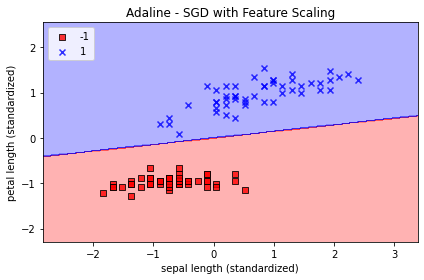

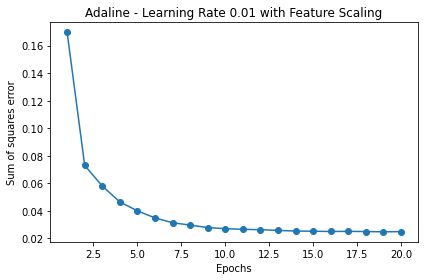

In [15]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean())/X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean())/X[:,1].std()

ada_sgd = Adaline_SGD(lr=0.01, epochs = 20)
ada_sgd.fit(X_std, y)
plot_decision_boundary(X_std, y, classifier=ada_sgd)
plt.title('Adaline - SGD with Feature Scaling')
plt.xlabel('sepal length (standardized)')
plt.ylabel('petal length (standardized)')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_sgd.cost_list)+1),
         ada_sgd.cost_list, marker='o')
plt.title('Adaline - Learning Rate 0.01 with Feature Scaling')
plt.xlabel('Epochs')
plt.ylabel('Sum of squares error')
plt.tight_layout()
plt.show()

-Rahul Sethi (sethir@iitk.ac.in)